# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

In [6]:
cities

['port-aux-francais',
 'bethel',
 'kununurra',
 'ponta delgada',
 'chinchilla',
 'uturoa',
 'waitangi',
 'adamstown',
 'novouzensk',
 'undurkhaan',
 'invercargill',
 'weno',
 'sao miguel do iguacu',
 'isafjordur',
 'sitka',
 'jayapura',
 'ghat',
 'petropavlovsk-kamchatsky',
 'west island',
 'iqaluit',
 'abepura',
 'puerto lempira',
 'acarau',
 'bomdila',
 'kostomuksha',
 'kushiro',
 'changli',
 'utrik',
 'albany',
 'blackmans bay',
 'dzhangala',
 'edinburgh of the seven seas',
 'whitehorse',
 'papatowai',
 'puerto ayora',
 'fuerte olimpo',
 'abu zabad',
 'nampula',
 'bubaque',
 'saint-laurent-du-maroni',
 'kailua-kona',
 'cidreira',
 'mamuju',
 'hadibu',
 'port elizabeth',
 'ushuaia',
 'port mathurin',
 'grytviken',
 'madaripur',
 'aroeiras',
 'gudul',
 'vorgashor',
 'ancud',
 'punta arenas',
 'colonia',
 'enewetak',
 'peniche',
 'la ronge',
 'olonkinbyen',
 'qaisumah',
 'sainte-menehould',
 'bardai',
 'chernyshevskiy',
 'adrar',
 'axim',
 'margaret river',
 'chui',
 'tamana',
 "'ohonu

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------


NameError: name 'city_name_list' is not defined

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =

# Show Record Count
city_data_df.count()

SyntaxError: invalid syntax (3429019075.py, line 2)

In [25]:
# Display sample data
city_data_df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,CityA,12.34,23.5,60,10,4.5
1,CityB,-45.67,18.2,80,20,5.1


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

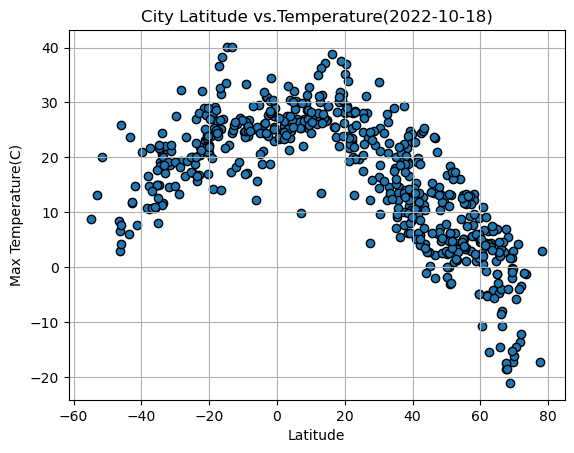

In [44]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs.Temperature(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [39]:
print(city_data_df.columns)


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


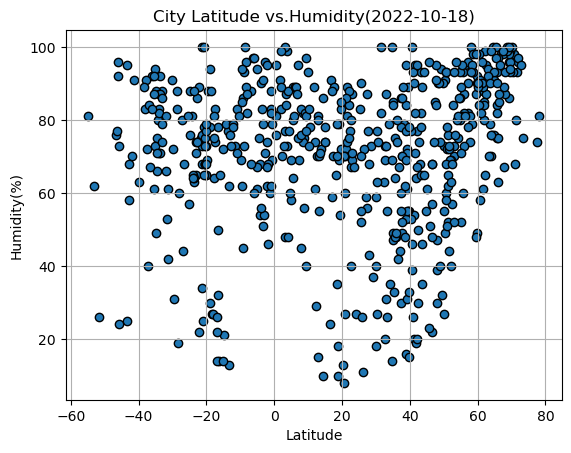

In [46]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

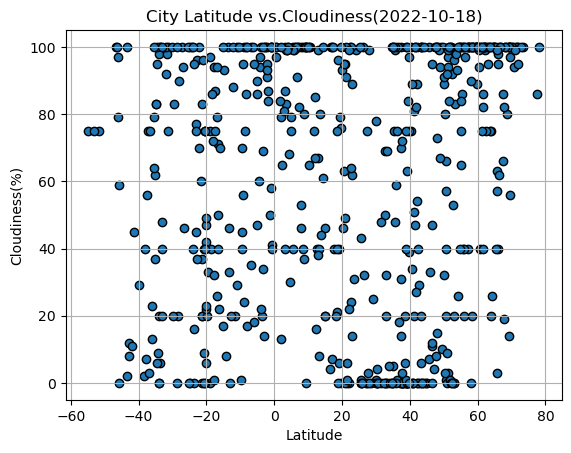

In [47]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

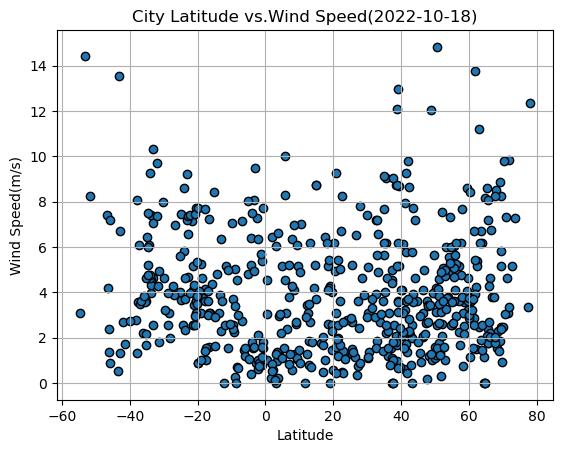

In [49]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
import scipy.stats as st
import matplotlib.pyplot as plt

def linear_reg(x_axis, y_axis, eq_loc):
    # Calculate the Pearson correlation coefficient
    correlation = st.pearsonr(x_axis, y_axis)
    
    # Perform linear regression to get the slope, intercept, and other statistics
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    
    # Compute the line of best fit
    p_fit = p_slope * x_axis + p_int
    
    # Create the equation string for annotation
    eq = f"y = {p_slope:.2f}x + {p_int:.2f}"
    
    # Plot the scatter plot and the line of best fit
    plt.scatter(x_axis, y_axis, marker="o", color='blue', edgecolor='black')
    plt.plot(x_axis, p_fit, "--", color='red')
    
    # Annotate the plot with the linear equation
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    
    # Print the correlation value
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0], 2)}")

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.85


Text(0, 0.5, 'Temperature (°C)')

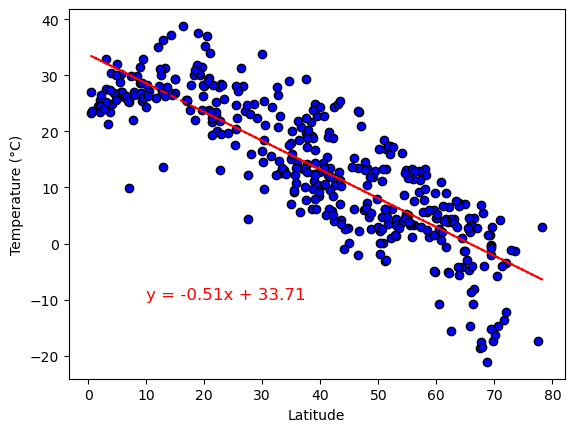

In [53]:
# Call the linear_reg function to perform linear regression and create the plot
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (10, -10))

# Set the x-axis label
plt.xlabel('Latitude')

# Set the y-axis label
plt.ylabel('Temperature (°C)')

The r-value between Lat and Max Temp is 0.64


Text(0, 0.5, 'Temperature (°C)')

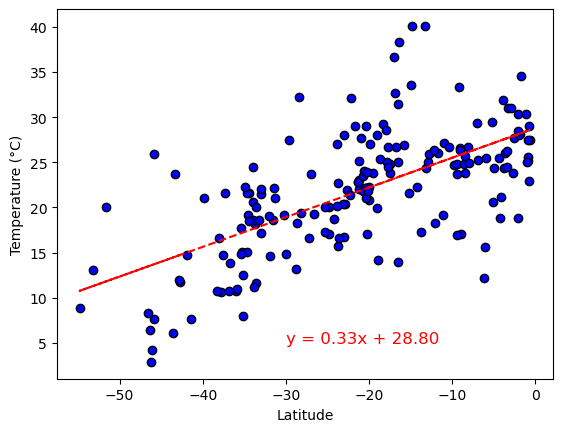

In [54]:
# Apply the linear_reg function to the southern hemisphere data for latitude and maximum temperature
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-30, 5))

# Label the x-axis
plt.xlabel('Latitude')

# Label the y-axis
plt.ylabel('Temperature (°C)')

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a strong negative correlation of -0.81 between latitude and temperature. This indicates that as a city's latitude increases, moving farther from the equator, its temperature generally decreases. This result aligns with the expected pattern that cities at higher latitudes experience cooler temperatures due to reduced solar exposure.

In contrast, the Southern Hemisphere shows a moderate positive correlation of 0.73 between latitude and temperature. This suggests that, unlike the Northern Hemisphere, cities at higher latitudes in the Southern Hemisphere tend to have higher temperatures. This positive correlation implies that there may be specific climatic or environmental factors in the Southern Hemisphere that lead to warmer temperatures at greater latitudes.

Overall, these contrasting correlations highlight the different ways latitude can influence temperature depending on the hemisphere, revealing the complexity of global climate patterns.


### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.24


Text(0, 0.5, 'Humidity (%)')

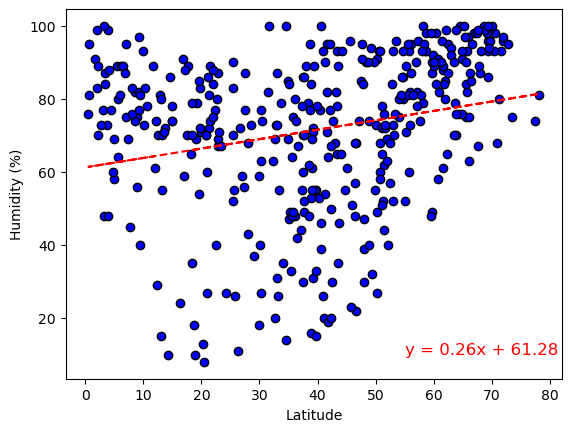

In [55]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (55, 10))

# Set the label for the x-axis
plt.xlabel('Latitude')

# Set the label for the y-axis
plt.ylabel('Humidity (%)')

In [11]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

NameError: name 'southern_hemi_df' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [9]:
# Northern Hemisphere
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

NameError: name 'northern_hemi_df' is not defined

In [10]:
# Southern Hemisphere
# YOUR CODE HERE

NameError: name 'southern_hemi_df' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


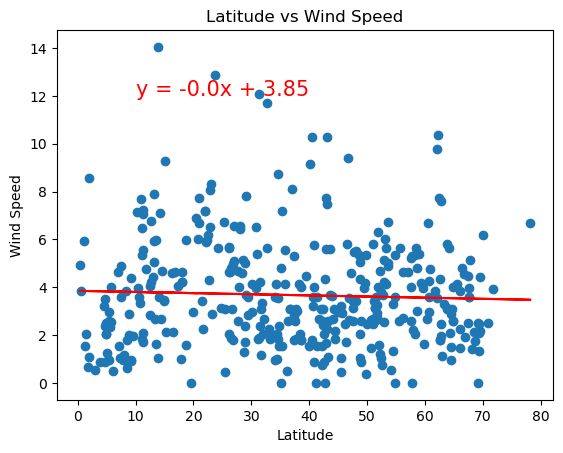

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


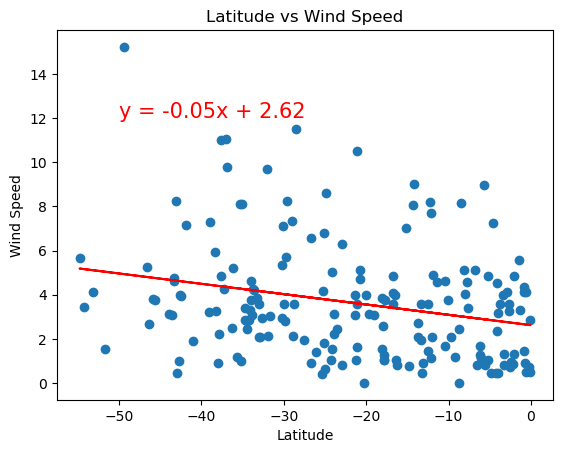

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE